In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,53980,None,None,85811.895638
2020-06-13,53981,None,None,79701.457195
2020-06-14,53982,None,None,74034.518113
2020-06-15,53983,None,None,68695.836639
2020-06-16,53984,None,None,63938.213208
...,...,...,...,...
2021-05-01,54303,None,None,15781.149070
2021-05-02,54304,None,None,15434.685700
2021-05-03,54305,None,None,15235.814334


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-05_2021-05-05-18-59.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-05-04_2021-05-04-16-41.pickle


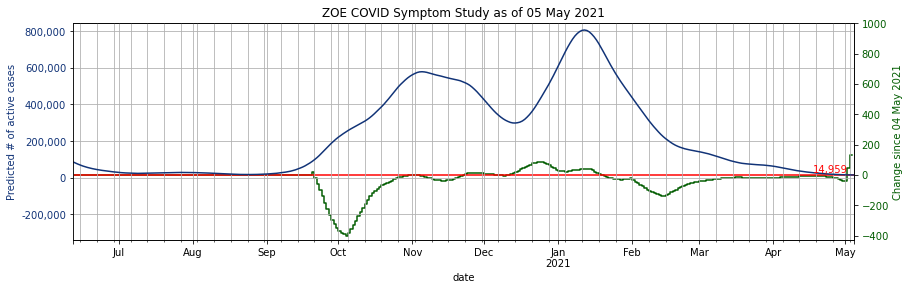

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

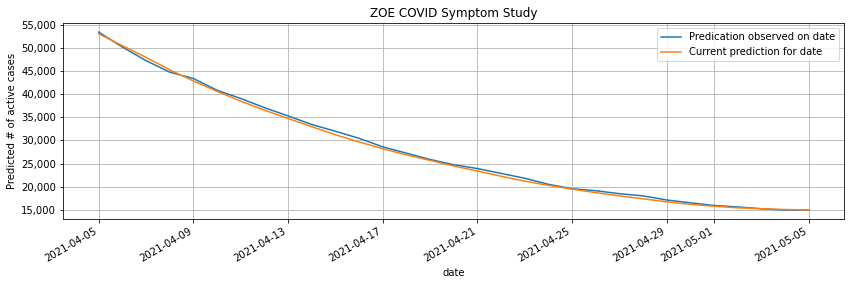

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-05-05_2021-05-05-18-59.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
297,Falkirk,S12000014,0.310779
309,Scottish Borders,S12000026,0.290508
299,Wolverhampton,E08000031,0.238013
105,Erewash,E07000036,0.196216
324,East Dunbartonshire,S12000045,0.182237
15,"Kingston upon Hull, City of",E06000010,0.177464
266,Bolton,E08000001,0.176488
302,Kirklees,E08000034,0.175486
18,North Lincolnshire,E06000013,0.168948
6,North East Derbyshire,E07000038,0.128552
